In [6]:
import numpy as np
import pandas as pd 
import warnings 
warnings.simplefilter('ignore')
import gc

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow/keras
from tensorflow import keras as kr
from tqdm.keras import TqdmCallback

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

Loaded 23196 news articles.
First few rows of the DataFrame:
                                               title  real  wcount
0  Kandi Burruss Explodes Over Rape Accusation on...     1      13
1  People's Choice Awards 2018: The best red carp...     1       9
2  Sophia Bush Sends Sweet Birthday Message to 'O...     1      15
3  Colombian singer Maluma sparks rumours of inap...     1      10
4  Gossip Girl 10 Years Later: How Upper East Sid...     1      17

Statistics of the word count:
count    23196.000000
mean        11.175677
std          3.981717
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         53.000000
Name: wcount, dtype: float64


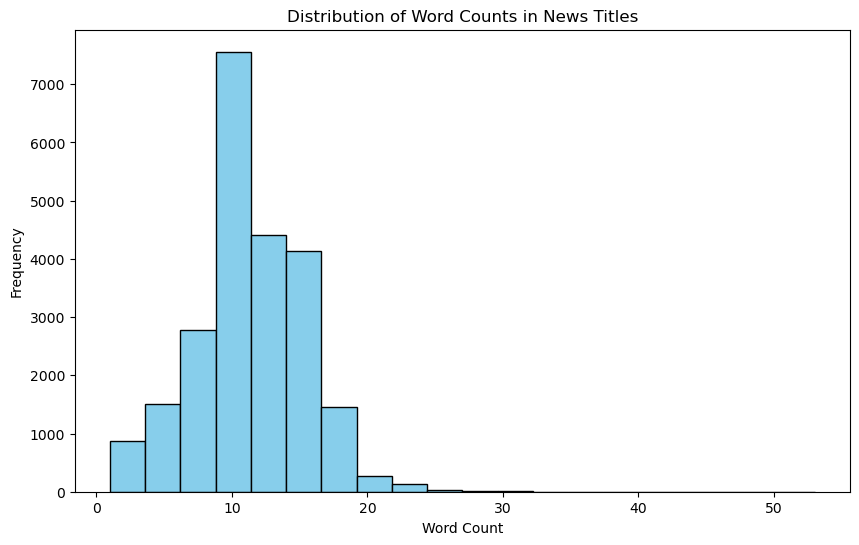


Sample News Title (index 0):
Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video)


In [7]:
# Import necessary libraries
import pandas as pd

# Loading the data 
wanted_cols = ['title', 'real']
data_df = pd.read_csv("FakeNewsNet.csv", usecols=wanted_cols)

# Drop NULLs (if any) & reset index
data_df.dropna(inplace=True)
data_df.reset_index(drop=True, inplace=True)

# Adding a new column [word count]
data_df['wcount'] = data_df['title'].apply(lambda x: len(x.split(' ')))

# Print the number of news articles after loading and cleaning the data
print(f"Loaded {data_df.shape[0]} news articles.")

# Print the first few rows of the DataFrame to inspect the data
print("First few rows of the DataFrame:")
print(data_df.head())

# Print basic statistics about the word count
print("\nStatistics of the word count:")
print(data_df['wcount'].describe())

# Print a histogram to visualize the distribution of word counts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data_df['wcount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in News Titles')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Sample print statement to access a specific news title
sample_index = 0
sample_title = data_df.loc[sample_index, 'title']
print(f"\nSample News Title (index {sample_index}):")
print(sample_title)


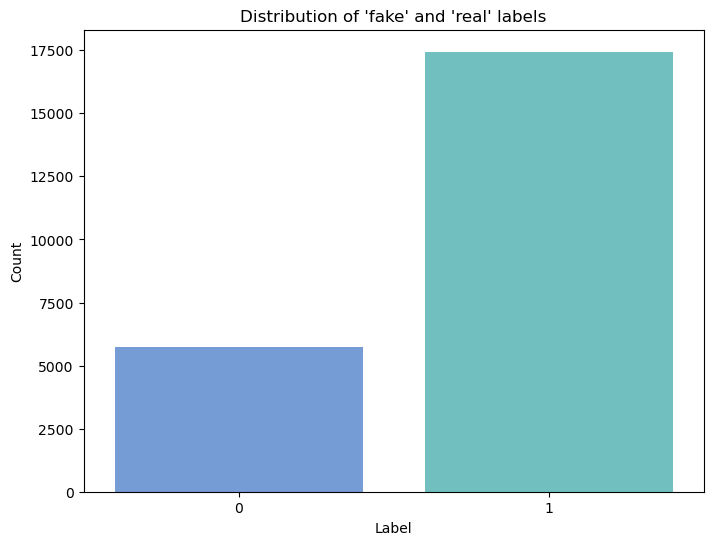

In [8]:
#EDA
# Count the occurrences of 'fake' and 'real' labels
label_counts = data_df['real'].value_counts()

# Create a barplot to visualize the label distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.6, palette="winter")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of 'fake' and 'real' labels")
plt.xticks(rotation=0)
plt.show()

In [9]:
data_df.shape

(23196, 3)

In [10]:
data_df.describe

<bound method NDFrame.describe of                                                    title  real  wcount
0      Kandi Burruss Explodes Over Rape Accusation on...     1      13
1      People's Choice Awards 2018: The best red carp...     1       9
2      Sophia Bush Sends Sweet Birthday Message to 'O...     1      15
3      Colombian singer Maluma sparks rumours of inap...     1      10
4      Gossip Girl 10 Years Later: How Upper East Sid...     1      17
...                                                  ...   ...     ...
23191  Pippa Middleton wedding: In case you missed it...     1      15
23192  Zayn Malik & Gigi Hadid’s Shocking Split: Why ...     0      16
23193  Jessica Chastain Recalls the Moment Her Mother...     1      17
23194  Tristan Thompson Feels "Dumped" After Khloé Ka...     0      16
23195  Kelly Clarkson Performs a Medley of Kendrick L...     1      17

[23196 rows x 3 columns]>

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Loading the data 
wanted_cols = ['title', 'real']
data_df = pd.read_csv("FakeNewsNet.csv", usecols=wanted_cols)

# Drop NULLs (if any) & reset index
data_df.dropna(inplace=True)
data_df.reset_index(drop=True, inplace=True)

# Adding a new column [word count]
data_df['wcount'] = data_df['title'].apply(lambda x: len(x.split(' ')))

# Print the number of news articles after loading and cleaning the data
print(f"Loaded {data_df.shape[0]} news articles.")

# Extracting features and labels
features = data_df['title'].values
labels = data_df['real'].values

# Print the first few records of features and labels
print("\nFirst few records of features:")
print(features[:5])
print("\nFirst few records of labels:")
print(labels[:5])

# Splitting the dataset into training and testing sets (80-20 split)
x_train, test_x, y_train, test_y = train_test_split(features, labels, test_size=0.20, random_state=np.random.randint(10))

# Print the number of records in the training and testing sets
print(f"\nTraining records: {len(x_train)} | Testing records: {len(test_x)}")


Loaded 23196 news articles.

First few records of features:
["Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video)"
 "People's Choice Awards 2018: The best red carpet looks"
 "Sophia Bush Sends Sweet Birthday Message to 'One Tree Hill' Co-Star Hilarie Burton: 'Breyton 4eva'"
 'Colombian singer Maluma sparks rumours of inappropriate relationship with AUNT'
 'Gossip Girl 10 Years Later: How Upper East Siders Shocked the World and Changed Pop Culture Forever']

First few records of labels:
[1 1 1 1 1]

Training records: 18556 | Testing records: 4640


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize a tokenizer
tokenizer = Tokenizer(num_words=None,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,
                      split=' ',
                      char_level=False,
                      oov_token=None)

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(x_train)


In [13]:
# tokenized text data
tokenizer_train = tokenizer.texts_to_sequences(x_train)
tokenizer_test = tokenizer.texts_to_sequences(test_x)

In [16]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Calculate the maximum sequence length (75th percentile of word count)
max_length = int(np.percentile([len(seq) for seq in tokenizer_train], 75))

# Print the maximum sequence length
print(f"Maximum Sequence Length: {max_length}")

# Pad the training sequences
padded_train = pad_sequences(tokenizer_train, maxlen=max_length, padding='post')

# Print the shape of the padded training data
print("Shape of Padded Training Data:")
print(padded_train.shape)

# Print a sample padded training sequence for visualization
sample_index = 0
sample_padded_sequence = padded_train[sample_index]
print("\nSample Padded Training Sequence:")
print(sample_padded_sequence)

# Pad the testing sequences
padded_test = pad_sequences(tokenizer_test, maxlen=max_length, padding='post')

# Print the shape of the padded testing data
print("\nShape of Padded Testing Data:")
print(padded_test.shape)



Maximum Sequence Length: 14
Shape of Padded Training Data:
(18556, 14)

Sample Padded Training Sequence:
[2228 1980 1135    7   11 1865 2959  938    2 1420   20  669  394   42]

Shape of Padded Testing Data:
(4640, 14)


In [17]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Define model parameters
vocab_size = len(tokenizer.word_index) + 1
num_epochs = 10
embedding_units = 32

# Create a Sequential model
main_model1 = Sequential(name='FakeNewsCatcher')

# Add an Embedding layer
main_model1.add(Embedding(input_dim=vocab_size, output_dim=embedding_units, input_length=max_length))

# Add a SimpleRNN layer
main_model1.add(SimpleRNN(units=embedding_units, return_sequences=False))

# Add a Dense output layer with sigmoid activation (binary classification)
main_model1.add(Dense(units=1, activation='sigmoid'))

# Compile the model
main_model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print("Model Summary:")
main_model1.summary()


Model Summary:
Model: "FakeNewsCatcher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 32)            697920    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 700,033
Trainable params: 700,033
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
580/580 [==============================] - 14s 19ms/step - loss: 0.4501 - accuracy: 0.8060 - val_loss: 0.4060 - val_accuracy: 0.8282
Epoch 2/10
580/580 [==============================] - 10s 17ms/step - loss: 0.3368 - accuracy: 0.8631 - val_loss: 0.3978 - val_accuracy: 0.8338
Epoch 3/10
580/580 [==============================] - 9s 15ms/step - loss: 0.2631 - accuracy: 0.8970 - val_loss: 0.4374 - val_accuracy: 0.8084
Epoch 4/10
580/580 [==============================] - 9s 15ms/step - loss: 0.1872 - accuracy: 0.9298 - val_loss: 0.4795 - val_accuracy: 0.8075
Epoch 5/10
580/580 [==============================] - 9s 16ms/step - loss: 0.1367 - accuracy: 0.9512 - val_loss: 0.5463 - val_accuracy: 0.7767
Epoch 6/10
580/580 [==============================] - 9s 16ms/step - loss: 0.1025 - accuracy: 0.9657 - val_loss: 0.5812 - val_accuracy: 0.7959
Epoch 7/10
580/580 [==============================] - 9s 16ms/step - loss: 0.0807 - accuracy: 0.9732 - val_loss: 0.7065 - val_accuracy: 0.75

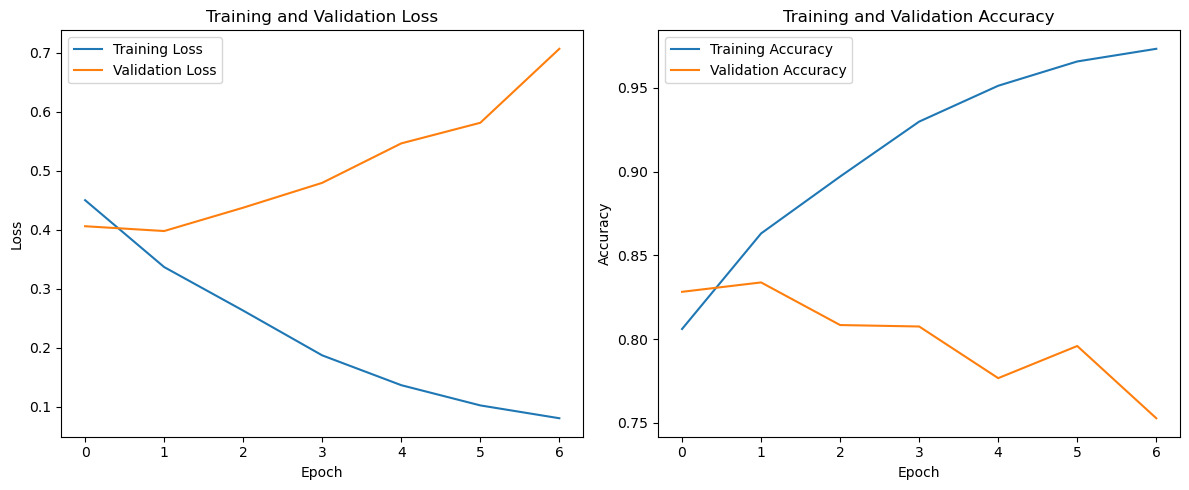

In [18]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import gc
import matplotlib.pyplot as plt

# Training parameters
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=5)

# Clear previous session and free up resources for re-runs
tf.keras.backend.clear_session()
gc.collect()

# Train the model
history = main_model1.fit(
    x=padded_train,
    y=y_train,
    epochs=num_epochs,
    shuffle=True,
    validation_data=(padded_test, test_y),
    verbose=1,
    callbacks=[early_stopping]
)

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
# Calculate the final training accuracy
final_train_accuracy = history.history['accuracy'][-1]

# Format the accuracy as a percentage
formatted_accuracy = '{:.2%}'.format(final_train_accuracy)

# Print the final training accuracy and number of epochs
print(f"Our model achieved an accuracy of {formatted_accuracy} after training for {len(history.epoch)} epochs.")


Our model achieved an accuracy of 99.14% after training for 9 epochs.


In [24]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test data
predictions = (main_model1.predict(padded_test) > 0.5).astype('int32')

# Print the classification report
classification_rep = classification_report(test_y, predictions)
print("Classification Report:\n", classification_rep)

# Calculate and print the accuracy score
accuracy = accuracy_score(test_y, predictions)
formatted_accuracy = '{:.2%}'.format(accuracy)
print(f"Accuracy Score: {formatted_accuracy}")


145/145 [==============================] - 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.56      0.50      1157
           1       0.84      0.78      0.81      3483

    accuracy                           0.72      4640
   macro avg       0.65      0.67      0.65      4640
weighted avg       0.74      0.72      0.73      4640

Accuracy Score: 72.33%


In [19]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, SimpleRNN, Dense

# Define model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_units = 32

# Create a new Sequential model
main_model2 = Sequential(name='FakeNewsDetector2')

# Add an Embedding layer
main_model2.add(Embedding(input_dim=vocab_size, output_dim=embedding_units, input_length=max_length))

# Add a Bidirectional SimpleRNN layer
main_model2.add(Bidirectional(SimpleRNN(units=embedding_units)))

# Add a Dense layer with ReLU activation
main_model2.add(Dense(units=embedding_units, activation='relu'))

# Add a Dense output layer with sigmoid activation (binary classification)
main_model2.add(Dense(units=1, activation='sigmoid'))

# Compile the model
main_model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
print("Model Summary:")
main_model2.summary()


Model Summary:
Model: "FakeNewsDetector2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 14, 32)            697920    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               4160      
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 704,193
Trainable params: 704,193
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
580/580 [==============================] - 16s 21ms/step - loss: 0.4423 - accuracy: 0.8067 - val_loss: 0.3999 - val_accuracy: 0.8278
Epoch 2/10
580/580 [==============================] - 11s 19ms/step - loss: 0.3301 - accuracy: 0.8666 - val_loss: 0.4009 - val_accuracy: 0.8356
Epoch 3/10
580/580 [==============================] - 12s 20ms/step - loss: 0.2418 - accuracy: 0.9028 - val_loss: 0.4487 - val_accuracy: 0.8233
Epoch 4/10
580/580 [==============================] - 10s 18ms/step - loss: 0.1639 - accuracy: 0.9394 - val_loss: 0.5256 - val_accuracy: 0.8011
Epoch 5/10
580/580 [==============================] - 11s 18ms/step - loss: 0.1118 - accuracy: 0.9603 - val_loss: 0.6722 - val_accuracy: 0.7341
Epoch 6/10
580/580 [==============================] - 10s 18ms/step - loss: 0.0846 - accuracy: 0.9725 - val_loss: 0.7094 - val_accuracy: 0.7599


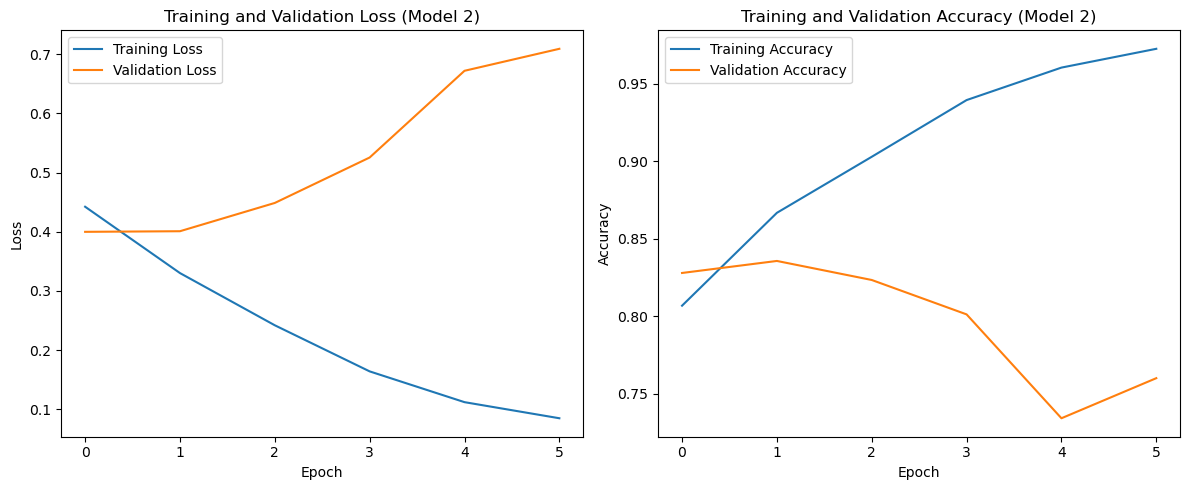

In [20]:

# Import necessary libraries
import tensorflow as tf
import gc
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Clear previous session and free up resources for re-runs
tf.keras.backend.clear_session()
gc.collect()

# Train the second model (model2)
history2 = main_model2.fit(
    x=padded_train,
    y=y_train,
    epochs=num_epochs,
    shuffle=True,
    validation_data=(padded_test, test_y),
    verbose=1,  # Change to 1 for progress bars
    callbacks=[early_stopping]
)

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model 2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
# Calculate the final training accuracy of the second model
final_train_accuracy2 = history2.history['accuracy'][-1]

# Format the accuracy as a percentage
formatted_accuracy2 = '{:.2%}'.format(final_train_accuracy2)

# Print the final training accuracy and the number of epochs for model2
print(f"Our second model achieved an accuracy of {formatted_accuracy2} after training for {len(history2.epoch)} epochs.")


Our second model achieved an accuracy of 97.75% after training for 7 epochs.


In [33]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test data using the second model (model2)
predictions2 = (main_model2.predict(padded_test) > 0.5).astype('int32')

# Print the classification report for the second model
classification_rep2 = classification_report(test_y, predictions2)
print("Classification Report for the Second Model:\n", classification_rep2)

# Calculate and print the accuracy score for the second model
accuracy2 = accuracy_score(test_y, predictions2)
formatted_accuracy2 = '{:.2%}'.format(accuracy2)
print(f"Accuracy Score for the Second Model: {formatted_accuracy2}")


145/145 [==============================] - 1s 3ms/step
Classification Report for the Second Model:
               precision    recall  f1-score   support

           0       0.45      0.69      0.54      1157
           1       0.87      0.72      0.79      3483

    accuracy                           0.71      4640
   macro avg       0.66      0.70      0.67      4640
weighted avg       0.77      0.71      0.73      4640

Accuracy Score for the Second Model: 71.12%
